<a href="https://colab.research.google.com/github/Leaf-Sense/ML-Model/blob/main/Initial_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 35.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully unins

In [ ]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import F1Score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import InputLayer, Input
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


2.18.0
Num GPUs Available:  1


In [ ]:
!nvidia-smi

Wed Dec 11 14:38:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!ls "/content/drive/Shared drives/C242-PS290 Capstone Team Project"

 Brainstorming	'Cloud Computing'  'Machine Learning'  'Mobile Development'   Referensi


In [ ]:
train_data_dir = '/content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/Dataset_Preprocessing2_DaunTeh/DatasetDaunTeh_hasil_Preprocessing2'
test_data_dir = '/content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/Dataset_Preprocessing2_DaunTeh/test'

In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 6
EPOCHS = 100
VALIDATION_SPLIT = 0.2

# Set random seed for reproducibility
tf.random.set_seed(42)

# # Training dataset with validation split
# train_dataset = tf.keras.utils.image_dataset_from_directory(
#     train_data_dir,
#     image_size=IMAGE_SIZE,
#     batch_size=BATCH_SIZE,
#     label_mode='categorical',
#     validation_split=VALIDATION_SPLIT,
#     subset='training',
#     seed=42
# )

# # Validation dataset with validation split
# validation_dataset = tf.keras.utils.image_dataset_from_directory(
#     train_data_dir,
#     image_size=IMAGE_SIZE,
#     batch_size=BATCH_SIZE,
#     label_mode='categorical',
#     validation_split=VALIDATION_SPLIT,
#     subset='validation',
#     seed=42
# )

# Training dataset (no split needed here)
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

# Test dataset (no split needed here)
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,          # Add some augmentation to prevent overfitting
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     fill_mode='reflect',
#     validation_split=0.2
# )

# test_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,          # Add some augmentation to prevent overfitting
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     fill_mode='reflect'
# )

# # Training generator
# train_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     target_size=IMAGE_SIZE,
#     batch_size=BATCH_SIZE,
#     class_mode='categorical',
#     subset='training',  # Training subset
#     shuffle=42
# )

# # Validation generator
# validation_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     target_size=IMAGE_SIZE,
#     batch_size=BATCH_SIZE,  # Keep the same batch size for consistency
#     class_mode='categorical',
#     subset='validation',  # Validation subset
#     shuffle=42
# )

# # Test generator
# test_generator = test_datagen.flow_from_directory(
#     test_data_dir,
#     target_size=IMAGE_SIZE,
#     batch_size=BATCH_SIZE,
#     class_mode='categorical',
#     shuffle=False
# )

class_names = train_dataset.class_names

Found 5281 files belonging to 6 classes.
Found 586 files belonging to 6 classes.


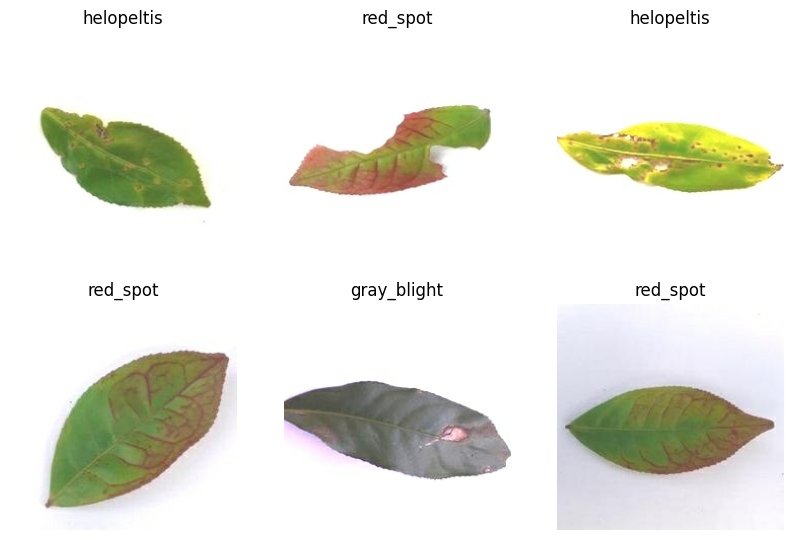

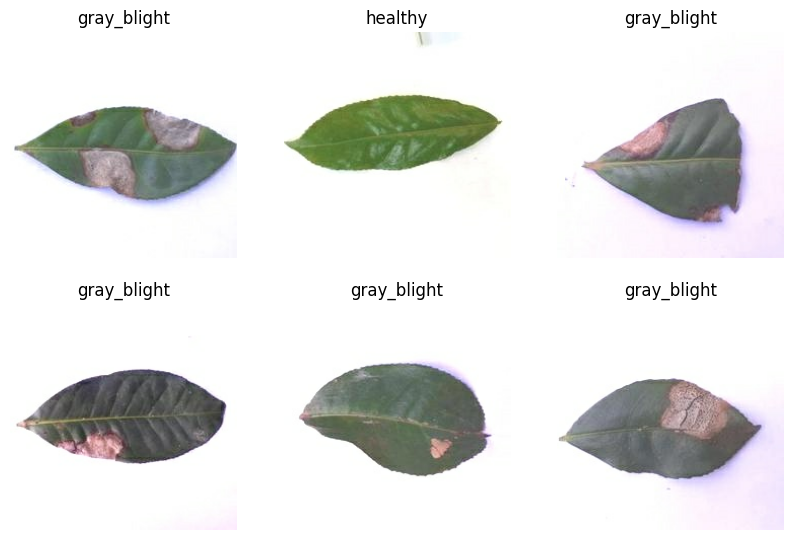

In [ ]:
# Get a batch of images and labels from the training dataset
image_batch, label_batch = next(iter(train_dataset))

# Create a subplot with 5x5 images
plt.figure(figsize=(10, 10))
for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(train_dataset.class_names[tf.argmax(label_batch[i]).numpy()])
    plt.axis("off")

plt.show()
print()

# Get a batch of images and labels from the test dataset
image_batch, label_batch = next(iter(test_dataset))

# Create a subplot with 5x5 images
plt.figure(figsize=(10, 10))
for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(train_dataset.class_names[tf.argmax(label_batch[i]).numpy()])
    plt.axis("off")

plt.show()

In [ ]:
# Check the shapes of labels in your datasets
for images, labels in train_dataset:
    print("Train labels shape:", labels.shape)
    break

for images, labels in test_dataset:
    print("Test labels shape:", labels.shape)
    break

Train labels shape: (32, 6)
Test labels shape: (32, 6)


In [ ]:
# Define the input layer
input_layer = Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Initialize ResNet50 as the base model
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_tensor=input_layer
)

# Fine-tuning: Make the last 10 layers trainable
for layer in base_model.layers[:-10]:
    layer.trainable = False
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Add global average pooling
x = base_model.output
x = GlobalAveragePooling2D()(x)

# First dense layer with regularization and dropout
x = Dense(1024, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = Dropout(0.5)(x)

# Second dense layer with regularization and dropout
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = Dropout(0.5)(x)

# Batch normalization layer
x = BatchNormalization()(x)

# Output layer
output_layer = Dense(NUM_CLASSES, activation='softmax', kernel_regularizer=l2(1e-5))(x)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=2e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy', F1Score(average='macro')]
)

# Print model summary
model.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                         

In [ ]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor
    factor=0.5,          # Factor to reduce the learning rate
    patience=3,          # Number of epochs with no improvement
    min_lr=1e-7,         # Minimum learning rate
    verbose=1            # Verbosity
)

In [ ]:
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=test_dataset,
    callbacks=[reduce_lr]
)

Epoch 1/20
166/166 [==============================] - 2099s 13s/step - loss: 2.1111 - accuracy: 0.2941 - f1_score: 0.2925 - val_loss: 1.1732 - val_accuracy: 0.6894 - val_f1_score: 0.6872 - lr: 2.0000e-05
Epoch 2/20
166/166 [==============================] - 24s 141ms/step - loss: 1.4477 - accuracy: 0.5207 - f1_score: 0.5168 - val_loss: 0.8573 - val_accuracy: 0.7969 - val_f1_score: 0.7964 - lr: 2.0000e-05
Epoch 3/20
166/166 [==============================] - 24s 138ms/step - loss: 1.0727 - accuracy: 0.6747 - f1_score: 0.6724 - val_loss: 0.7159 - val_accuracy: 0.8311 - val_f1_score: 0.8306 - lr: 2.0000e-05
Epoch 4/20
166/166 [==============================] - 23s 135ms/step - loss: 0.8824 - accuracy: 0.7519 - f1_score: 0.7505 - val_loss: 0.6211 - val_accuracy: 0.8601 - val_f1_score: 0.8594 - lr: 2.0000e-05
Epoch 5/20
166/166 [==============================] - 24s 143ms/step - loss: 0.7386 - accuracy: 0.8052 - f1_score: 0.8045 - val_loss: 0.5487 - val_accuracy: 0.8788 - val_f1_score: 0.87

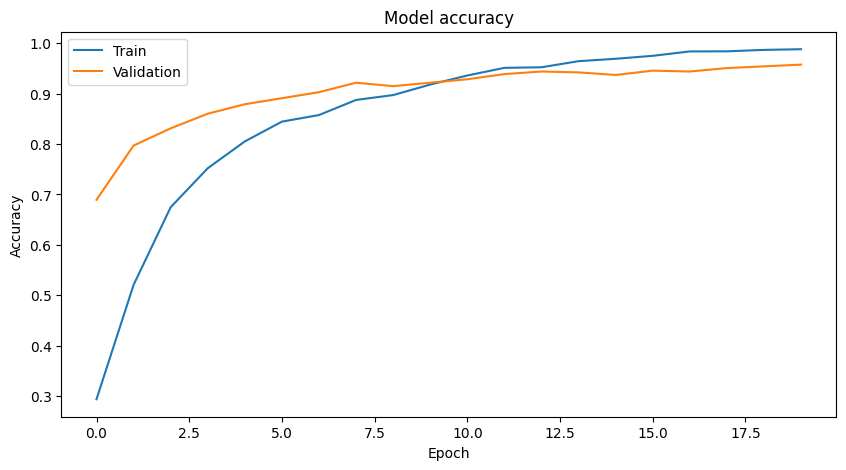

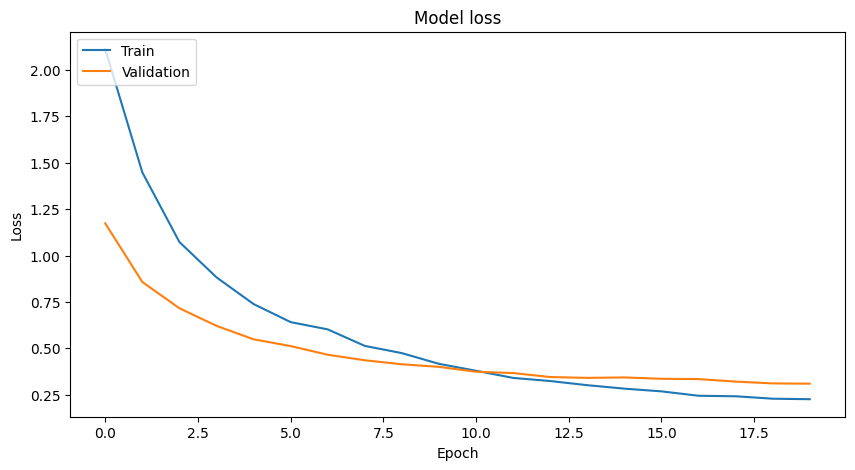

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Get the class names
class_names = train_dataset.class_names

# Initialize dictionaries to track total instances and false predictions for each class
total_instance = {class_name: 0 for class_name in class_names}
false_predictions = {class_name: 0 for class_name in class_names}

# Assuming you have a trained model
for images, labels in test_dataset:
    # Predict the class probabilities
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels.numpy(), axis=1)

    # Update total instances and false predictions
    for true_class, predicted_class in zip(true_classes, predicted_classes):
        true_class_name = class_names[true_class]
        total_instance[true_class_name] += 1
        if true_class != predicted_class:
            false_predictions[true_class_name] += 1

# Print the frequency of false predictions for each class
print("Class-wise False Predictions:")
for class_name in class_names:
    total = total_instance[class_name]
    false = false_predictions[class_name]
    print(f"Class: {class_name}, False Predictions: {false}, Total Instances: {total}")


1/1 [==============================] - 1s 1s/step
Class-wise False Predictions:
Class: algal_spot, False Predictions: 3, Total Instances: 100
Class: brown_blight, False Predictions: 7, Total Instances: 86
Class: gray_blight, False Predictions: 1, Total Instances: 100
Class: healthy, False Predictions: 3, Total Instances: 100
Class: helopeltis, False Predictions: 8, Total Instances: 100
Class: red_spot, False Predictions: 3, Total Instances: 100


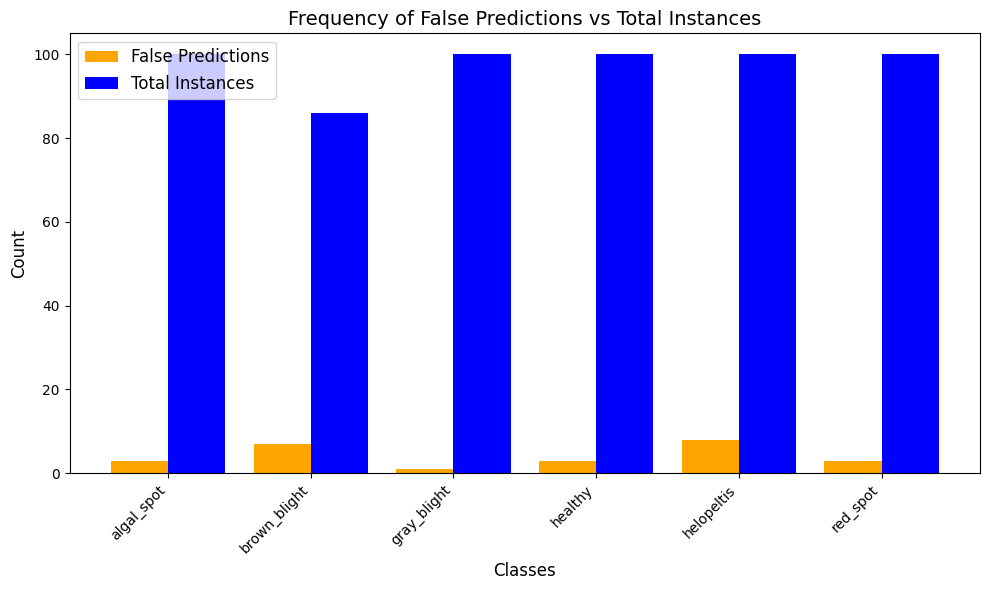

In [ ]:
# Extract data for plotting
classes = list(class_names)
false_counts = [false_predictions[class_name] for class_name in classes]
total_counts = [total_instance[class_name] for class_name in classes]

# Plot the data
x = np.arange(len(classes))  # X-axis positions for each class
width = 0.4  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width / 2, false_counts, width, label='False Predictions', color='orange')
ax.bar(x + width / 2, total_counts, width, label='Total Instances', color='blue')

# Add labels, title, and legend
ax.set_xlabel('Classes', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Frequency of False Predictions vs Total Instances', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 37ms/step


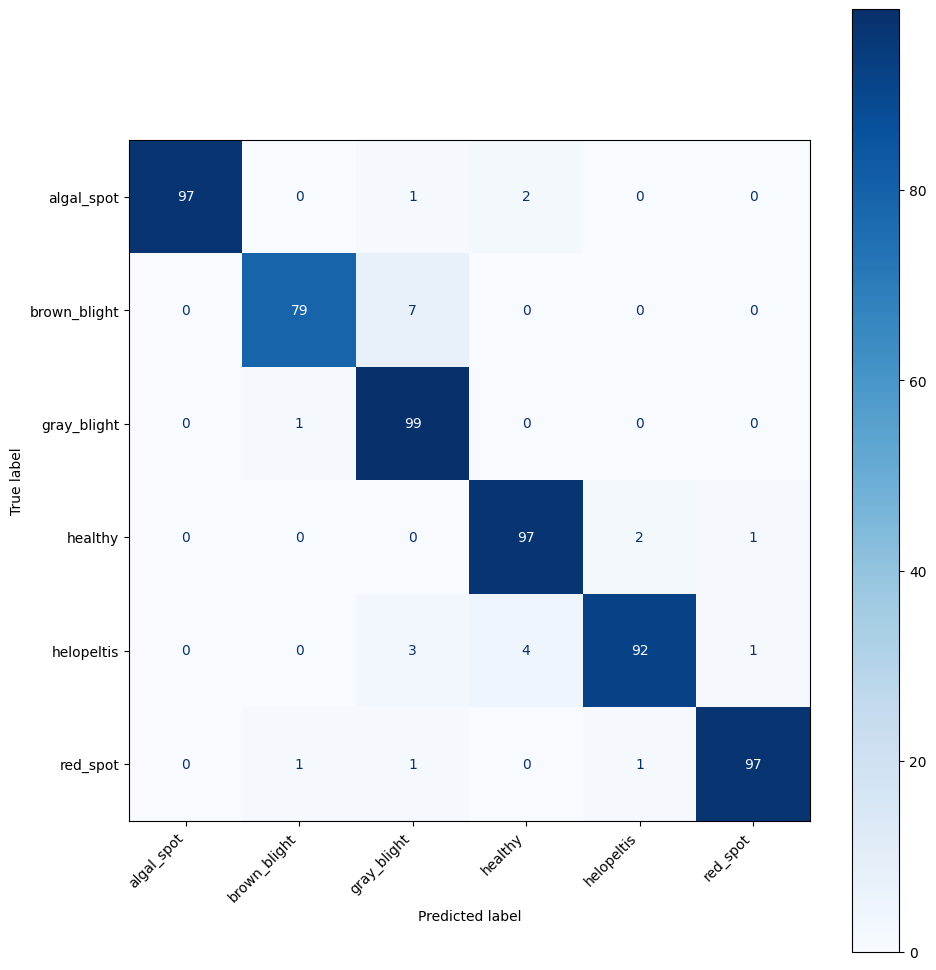

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Collect true and predicted labels
y_true = []
y_pred = []

for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels.numpy(), axis=1)
    y_true.extend(true_classes)
    y_pred.extend(predicted_classes)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create the confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust figure size as needed
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

1/1 [==============================] - 0s 44ms/step


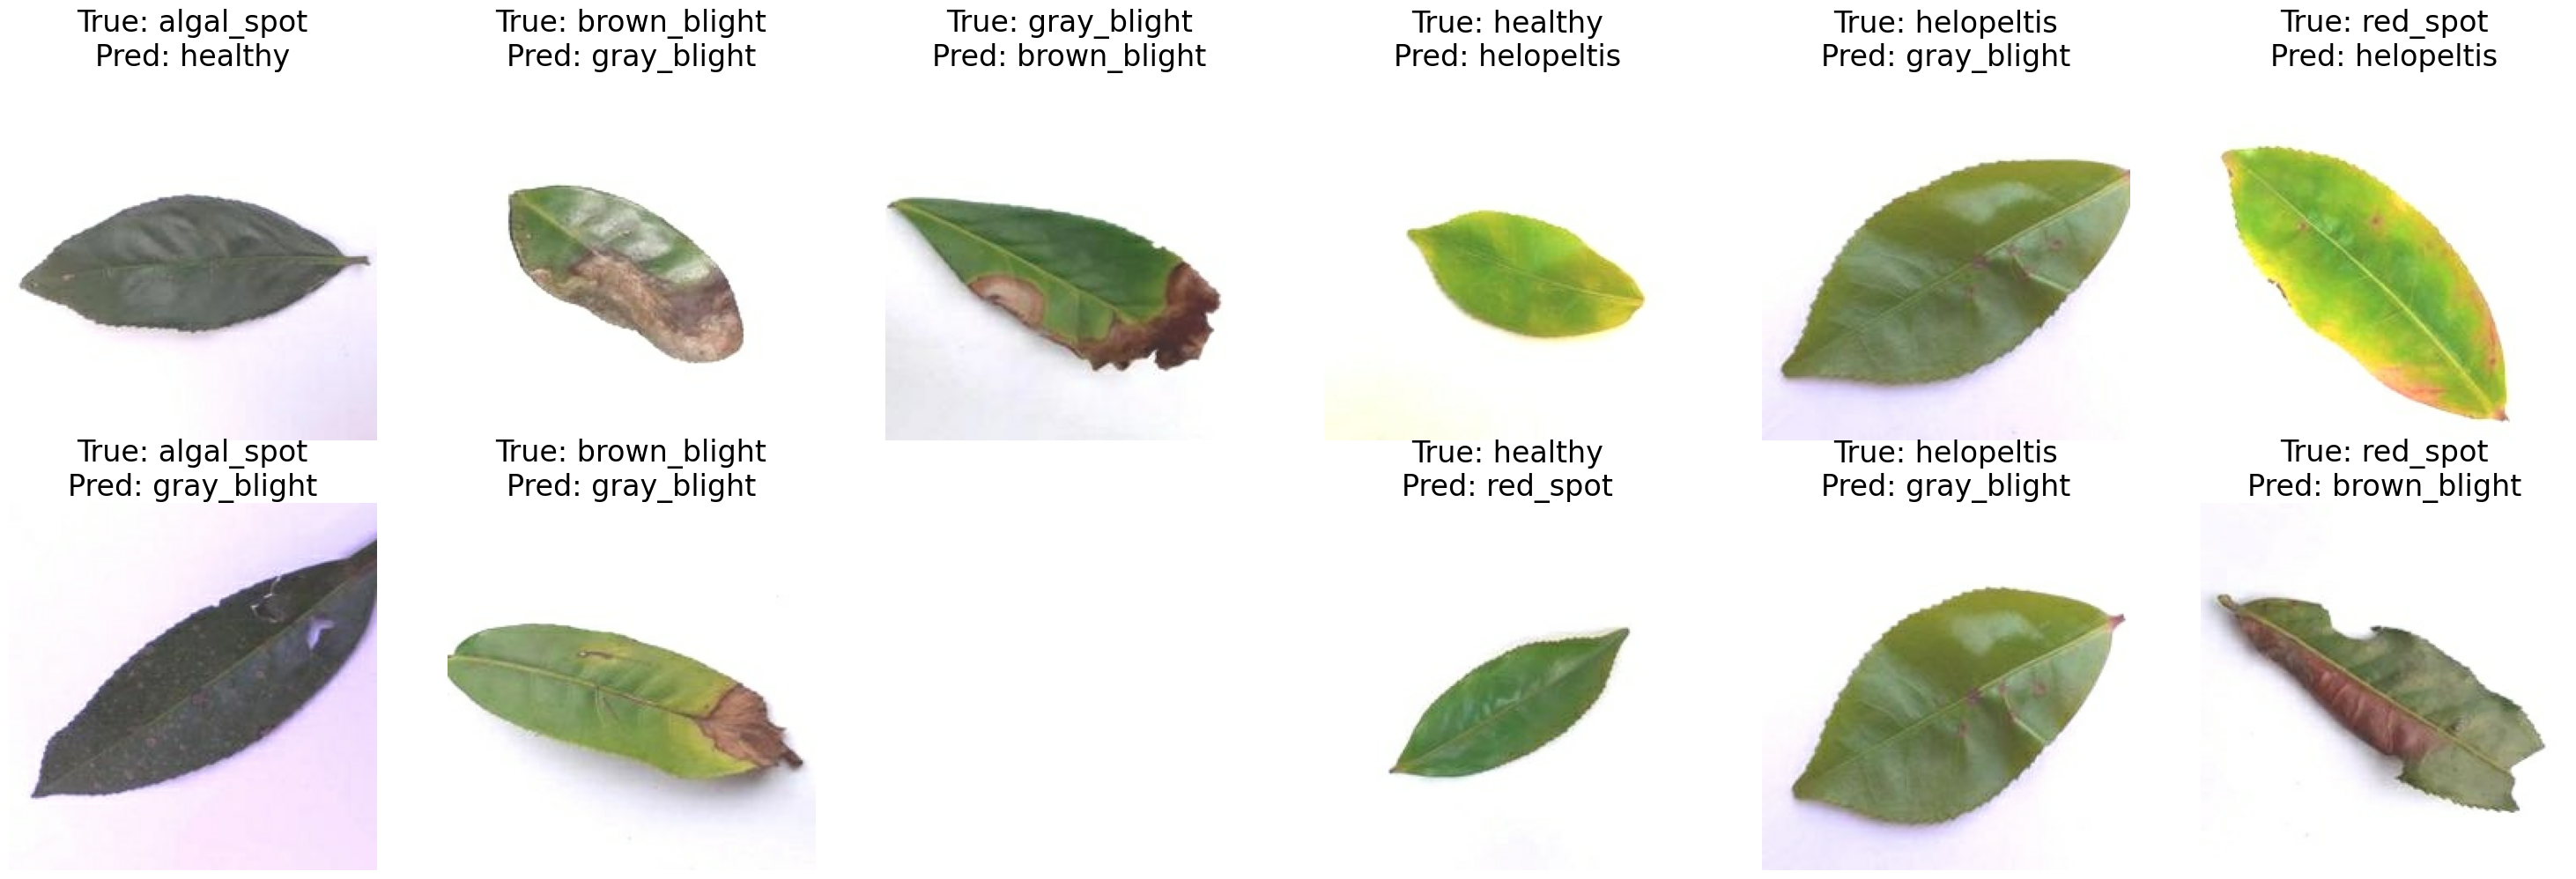

In [ ]:
class_names = train_dataset.class_names

# Dictionary to store wrongly classified samples for each class
wrongly_classified = {class_name: [] for class_name in class_names}

# Assuming you have a trained model
for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels.numpy(), axis=1)

    # Identify wrongly classified samples and store them
    for i, (true_class, predicted_class) in enumerate(zip(true_classes, predicted_classes)):
        if true_class != predicted_class:
            true_class_name = class_names[true_class]
            wrongly_classified[true_class_name].append((images[i], class_names[predicted_class]))

# Display the first few wrongly classified images for each class
num_samples_to_show = 2  # Number of images to display per class

# Create a transposed layout of the axes
fig, axes = plt.subplots(num_samples_to_show, len(class_names), figsize=(5 * len(class_names), 5 * num_samples_to_show))

# In case there's only one class, axes will be a single array, so make sure it's handled
if len(class_names) == 1:  # Handle the case where there's only one class
    axes = [axes]

for i, class_name in enumerate(class_names):
    wrong_samples = wrongly_classified[class_name]
    for j in range(num_samples_to_show):
        ax = axes[j][i]  # Swap the indexing to transpose the layout
        if j < len(wrong_samples):
            image, predicted_label = wrong_samples[j]
            ax.imshow(image.numpy().astype("uint8"))  # Convert to a displayable format
            ax.set_title(f"True: {class_name}\nPred: {predicted_label}", fontsize=24)
            ax.axis('off')
        else:
            ax.axis('off')  # Hide unused subplots

plt.tight_layout()
plt.show()


In [ ]:
import time

# Get the current date in the format YYYY-MM-DD
current_date = time.strftime("%Y-%m-%d")

# Save the model with the current date as the filename
saved_model_path = f"model-{current_date}.h5"

# Assuming 'model' is your trained model
model.save(saved_model_path)

string_folder = f"model-{current_date}"

# Convert the Keras model to TensorFlow.js format
!tensorflowjs_converter \
    --input_format=keras \
    /content/{saved_model_path} \
    /content/{string_folder}

/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2024-12-11 16:01:51.034182: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733932911.055075   26324 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733932911.062784   26324 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!


In [ ]:
!zip -r /content/model-{current_date}.zip /content/{string_folder}

  adding: content/model-2024-12-11/ (stored 0%)
  adding: content/model-2024-12-11/group1-shard19of25.bin (deflated 7%)
  adding: content/model-2024-12-11/group1-shard12of25.bin (deflated 7%)
  adding: content/model-2024-12-11/group1-shard25of25.bin (deflated 8%)
  adding: content/model-2024-12-11/group1-shard23of25.bin (deflated 7%)
  adding: content/model-2024-12-11/group1-shard15of25.bin (deflated 7%)
  adding: content/model-2024-12-11/group1-shard7of25.bin (deflated 7%)
  adding: content/model-2024-12-11/group1-shard10of25.bin (deflated 7%)
  adding: content/model-2024-12-11/group1-shard5of25.bin (deflated 7%)
  adding: content/model-2024-12-11/group1-shard18of25.bin (deflated 7%)
  adding: content/model-2024-12-11/model.json (deflated 96%)
  adding: content/model-2024-12-11/group1-shard4of25.bin (deflated 7%)
  adding: content/model-2024-12-11/group1-shard22of25.bin (deflated 7%)
  adding: content/model-2024-12-11/group1-shard16of25.bin (deflated 7%)
  adding: content/model-2024-1